In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('conso.csv', sep=';',parse_dates=True)
df = pd.DataFrame(df1)

In [2]:
df.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207796 entries, 0 to 2207795
Data columns (total 13 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   date_heure                          object 
 1   date                                object 
 2   heure                               object 
 3   code_insee_region                   int64  
 4   region                              object 
 5   consommation_brute_gaz_grtgaz       float64
 6   statut_grtgaz                       object 
 7   consommation_brute_gaz_terega       float64
 8   statut_terega                       object 
 9   consommation_brute_gaz_totale       float64
 10  consommation_brute_electricite_rte  int64  
 11  statut_rte                          object 
 12  consommation_brute_totale           float64
dtypes: float64(4), int64(2), object(7)
memory usage: 219.0+ MB


### Q1

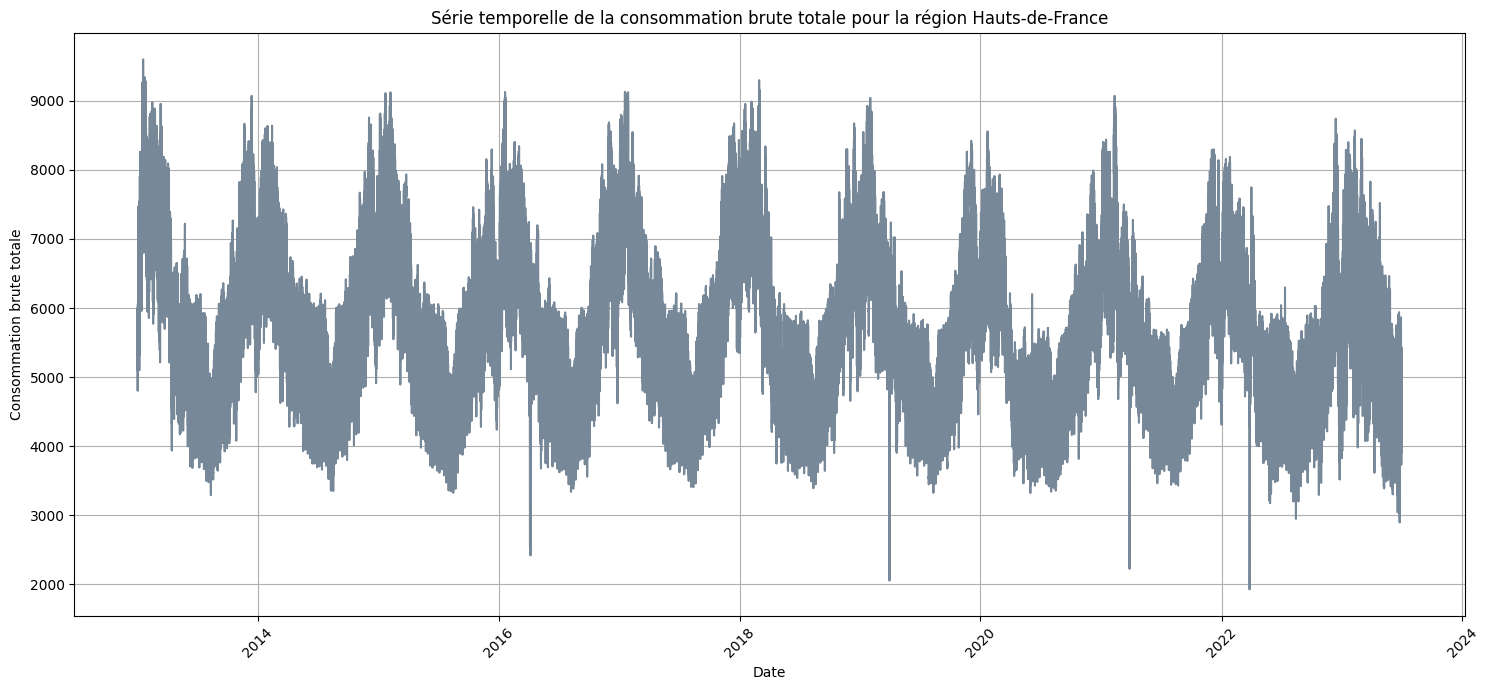

In [19]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france = df_hauts_de_france.sort_index()

# df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()



plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france.index, df_hauts_de_france['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Q2

/tmp/ipykernel_12153/3127571244.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()
/tmp/ipykernel_12153/3127571244.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hauts_de_france_weekly = df_hauts_de_france.resample('W').mean()
/tmp/ipykernel_12153/3127571244.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hauts_de_france_monthly = df_h

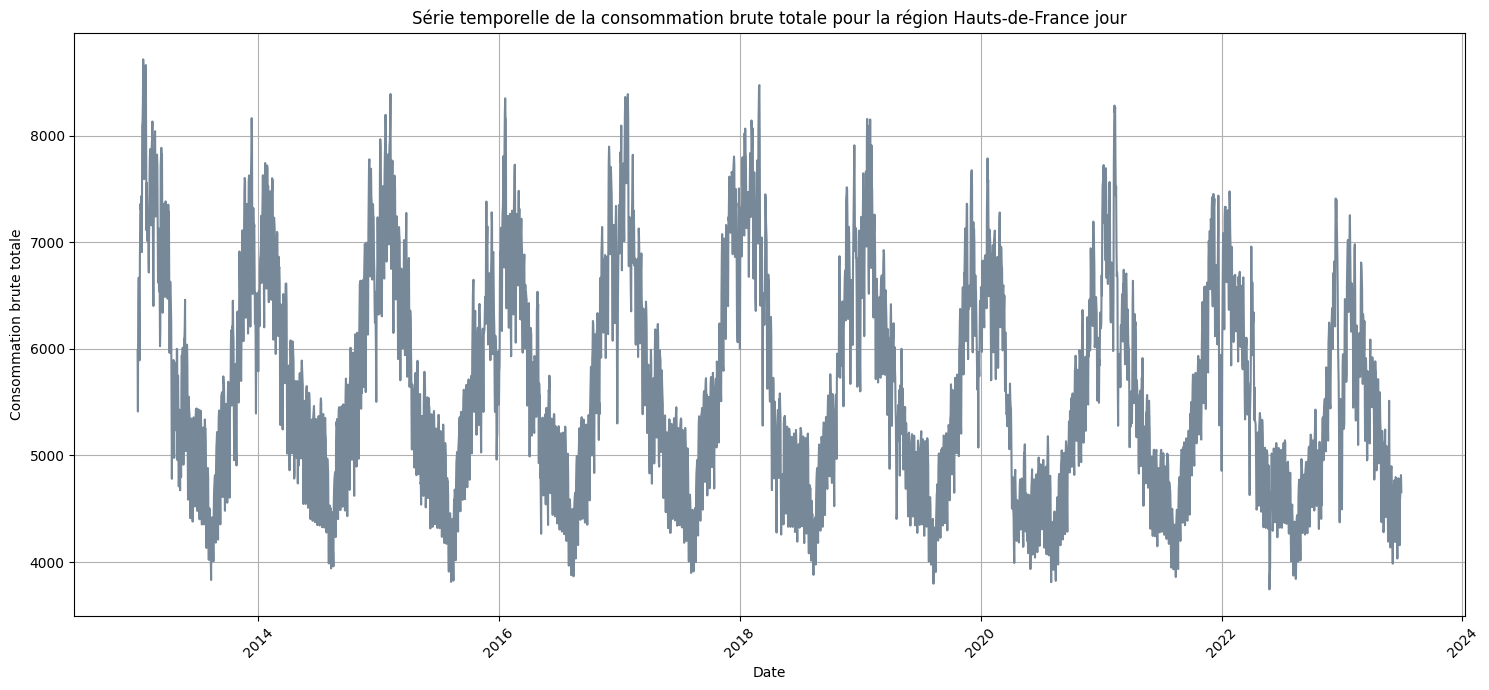

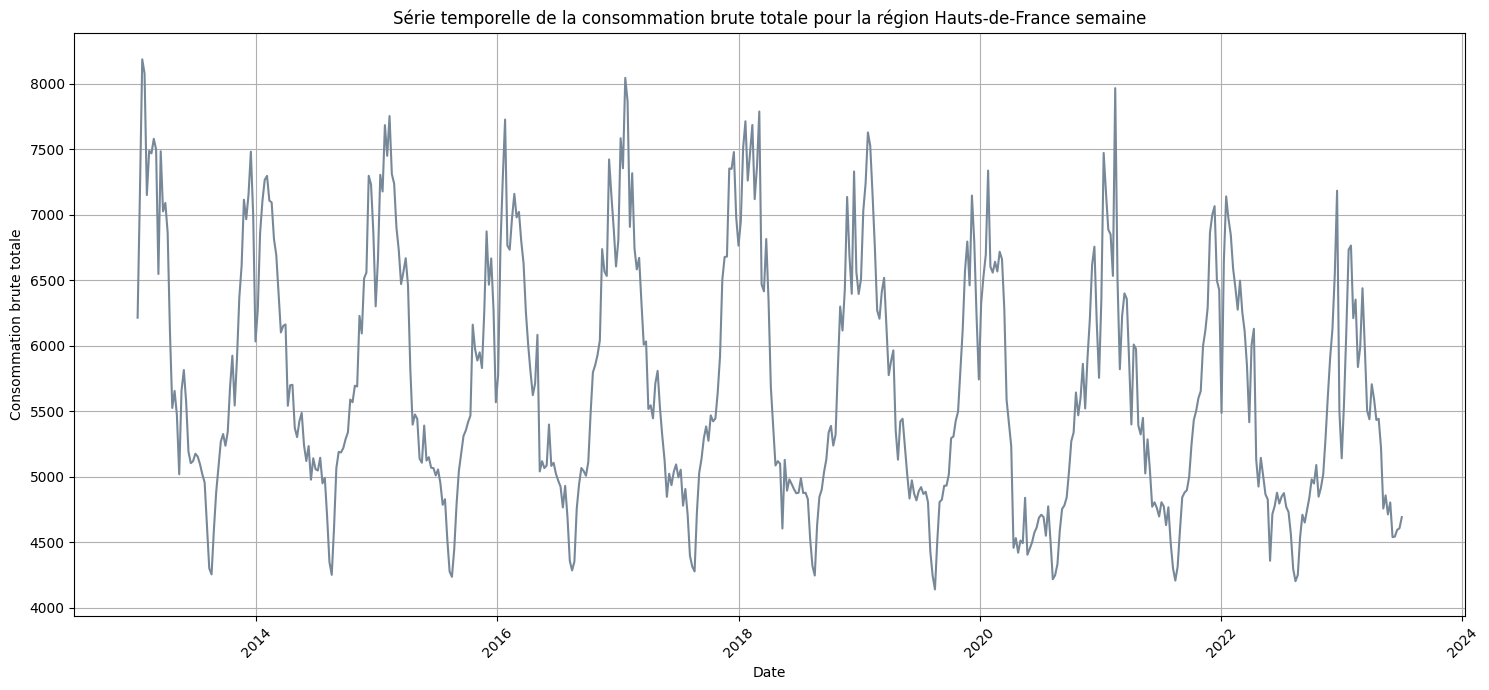

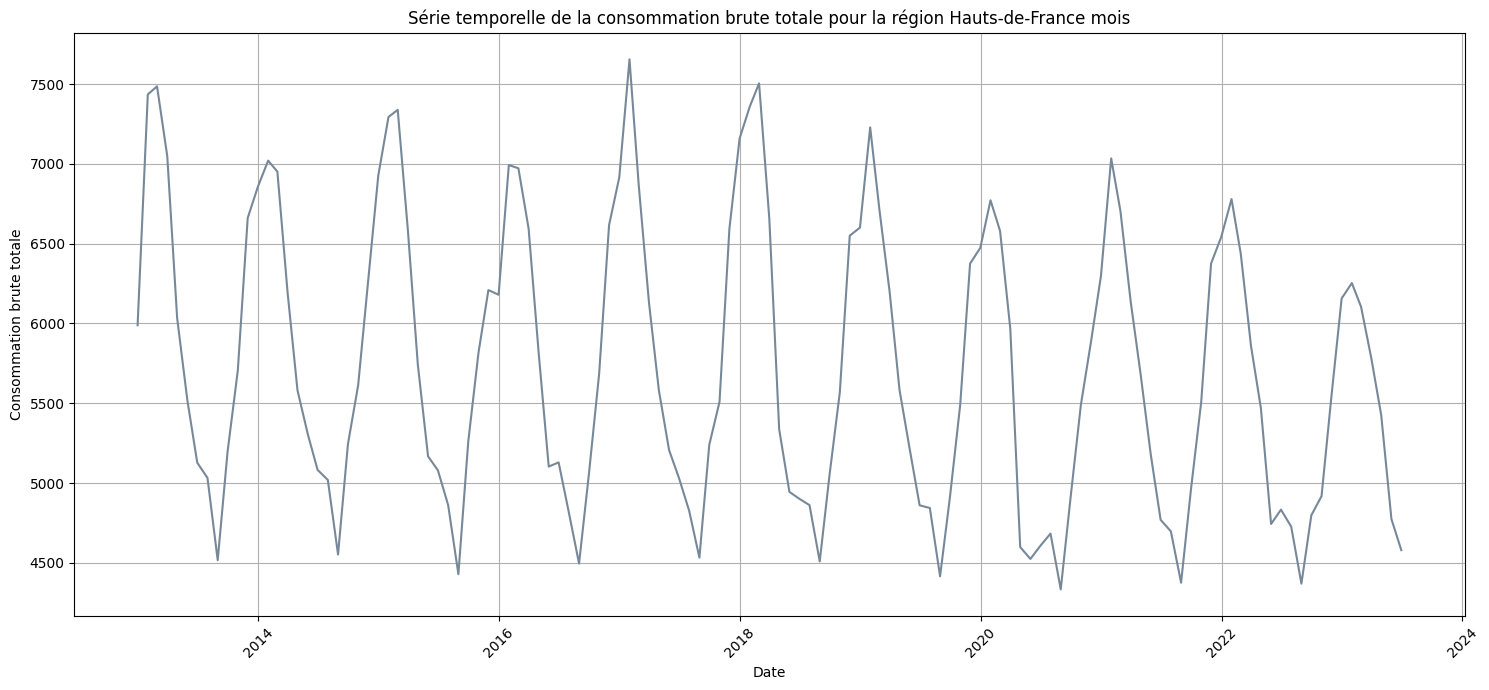

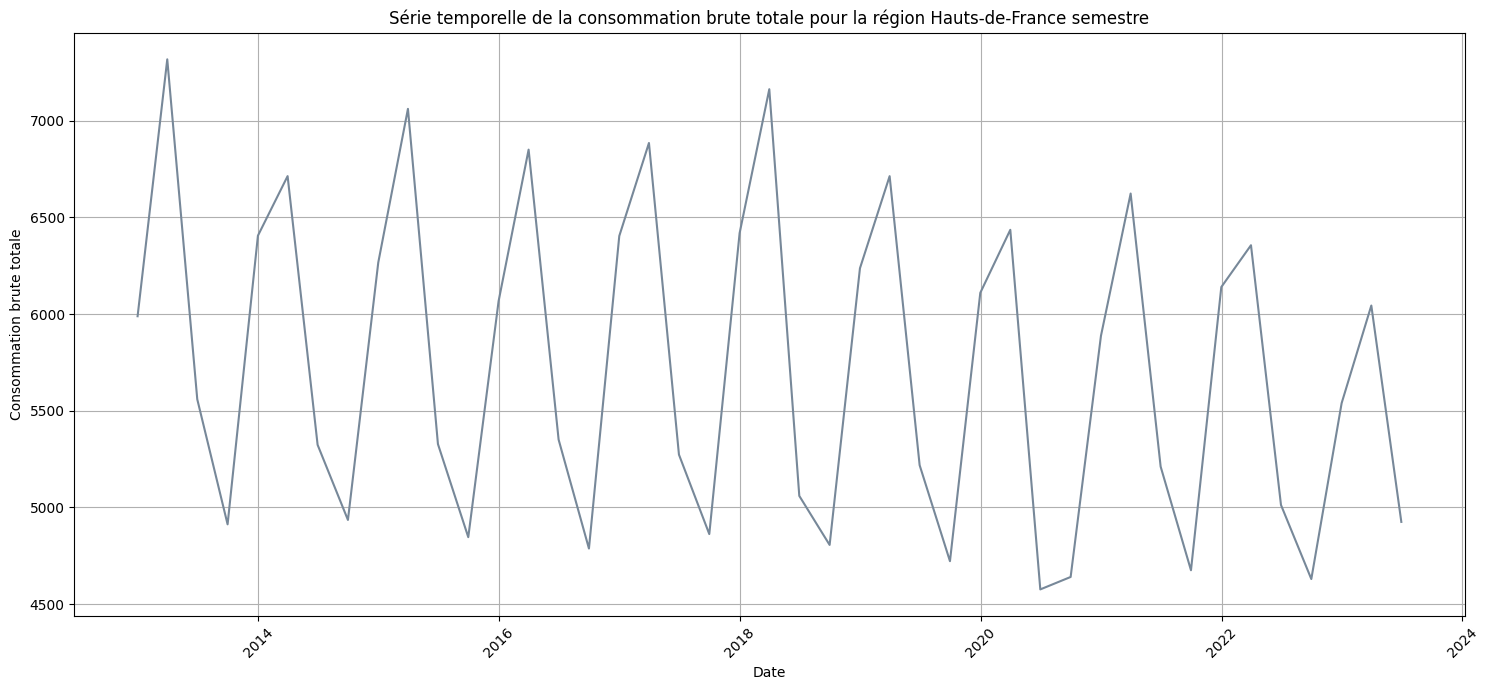

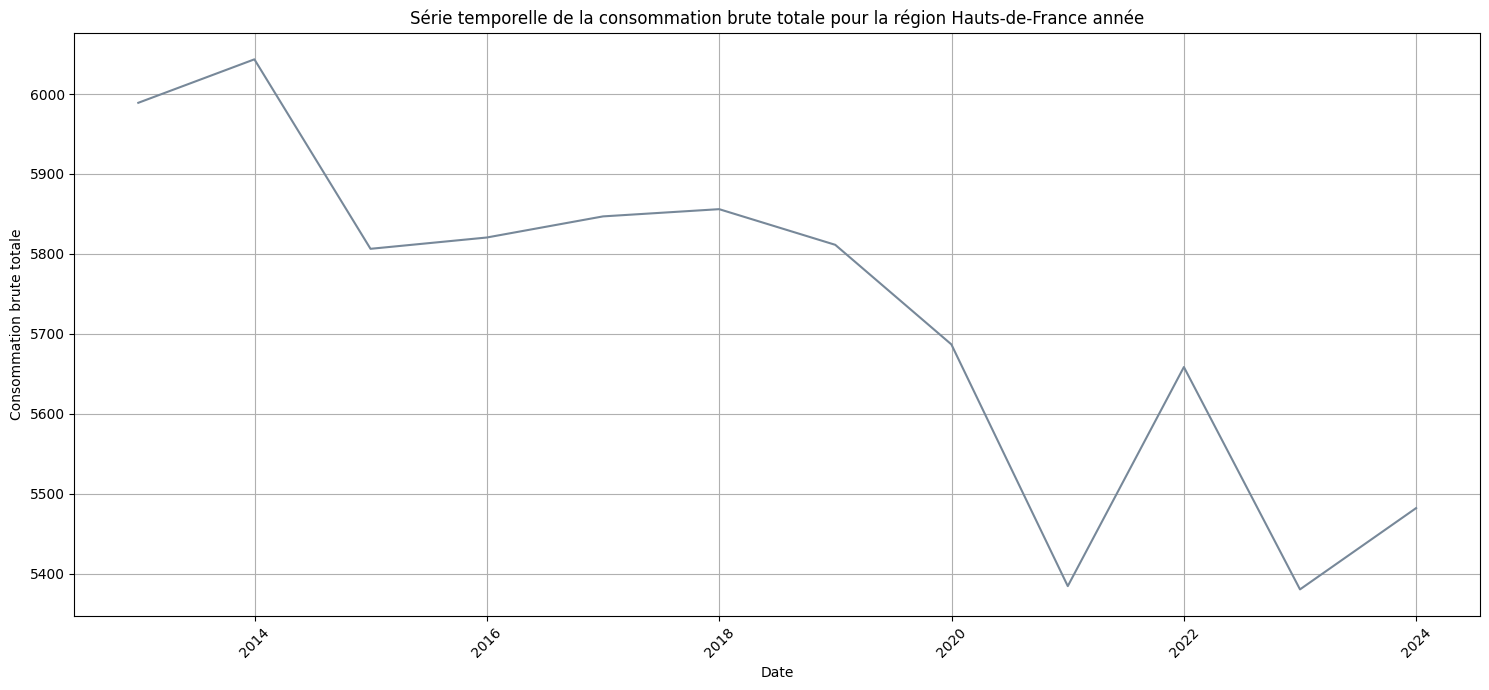

In [23]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()
df_hauts_de_france_weekly = df_hauts_de_france.resample('W').mean()
df_hauts_de_france_monthly = df_hauts_de_france.resample('M').mean()
df_hauts_de_france_quarter = df_hauts_de_france.resample('Q').mean()
df_hauts_de_france_yearly = df_hauts_de_france.resample('Y').mean()




plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France jour')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_weekly.index, df_hauts_de_france_weekly['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France semaine')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_monthly.index, df_hauts_de_france_monthly['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France mois')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_quarter.index, df_hauts_de_france_quarter['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France semestre')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_yearly.index, df_hauts_de_france_yearly['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France année')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183983 entries, 2013-01-21 10:00:00+00:00 to 2023-06-23 11:00:00+00:00
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   date                                183983 non-null  object 
 1   heure                               183983 non-null  object 
 2   code_insee_region                   183983 non-null  int64  
 3   region                              183983 non-null  object 
 4   consommation_brute_gaz_grtgaz       90522 non-null   float64
 5   statut_grtgaz                       91986 non-null   object 
 6   consommation_brute_gaz_terega       0 non-null       float64
 7   statut_terega                       0 non-null       object 
 8   consommation_brute_gaz_totale       90522 non-null   float64
 9   consommation_brute_electricite_rte  183983 non-null  int64  
 10  statut_rte                          183983 non

### Q3

A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

/tmp/ipykernel_12153/83727252.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()


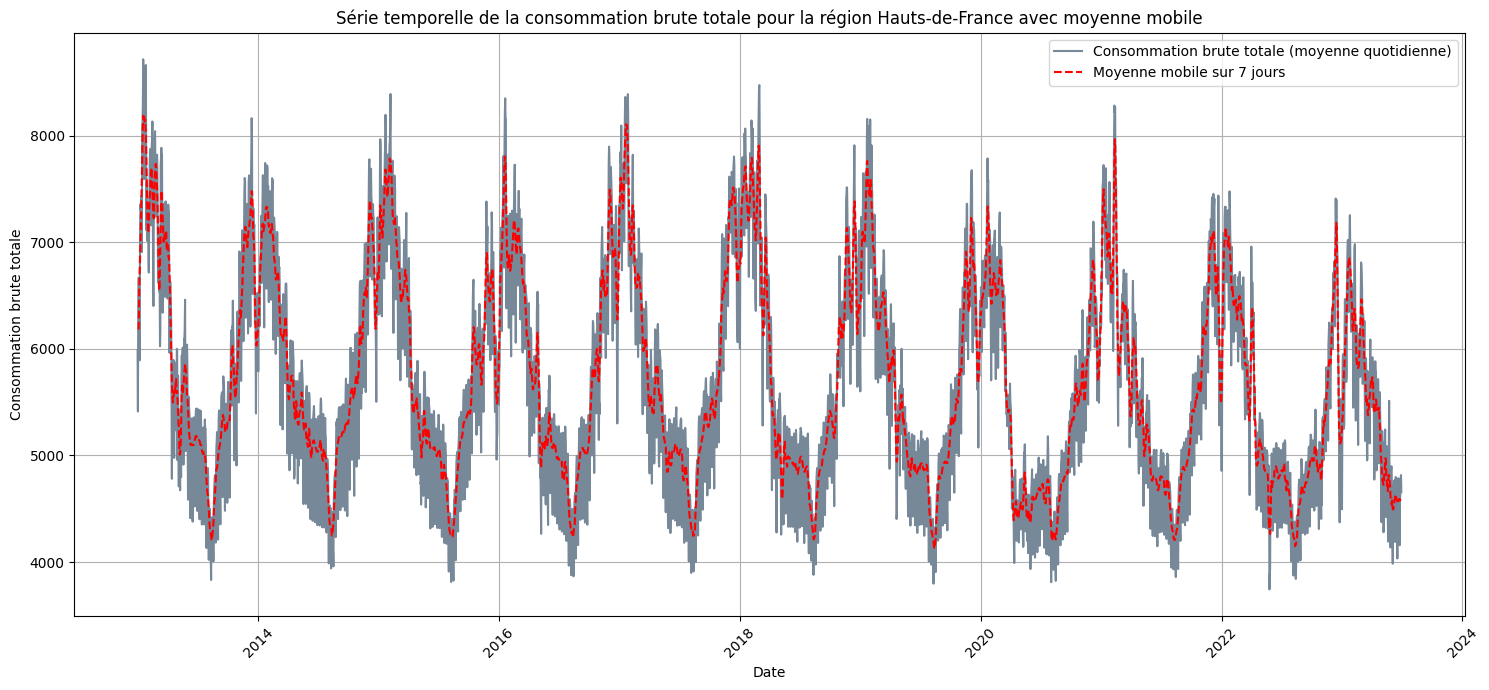

In [24]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()


# Calculer la moyenne mobile sur 7 jours
df_hauts_de_france_daily['rolling_mean'] = df_hauts_de_france_daily['consommation_brute_electricite_rte'].rolling(window=7, center=True).mean()

# Plot
plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['rolling_mean'], label='Moyenne mobile sur 7 jours', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France avec moyenne mobile')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Q4

la difference entre les agrégations et la moyenne mobile est que l'agrégation renvoi l'état actuelle des valeurs alors que la moyenne mobile élimine le bruit et renvoi une idée plus clair de la tendance d'évolution des valeurs.

### Q5

A l’aide de box-plots, observez la saisonnalité:
- trimestrielle (chaque trimestre)
- mensuelle (chaque mois)
- hebdomadaire (chaque jour de la semaine)
- journalière (chaque heure)

A partir d’ici on travaille sur les times series moyenisées par jour. 


/tmp/ipykernel_12153/977675642.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()


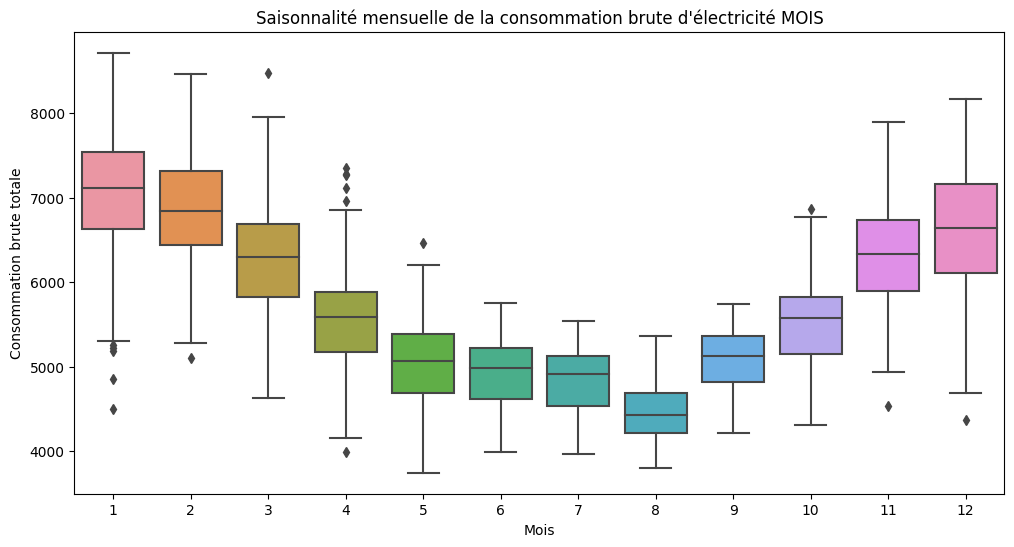

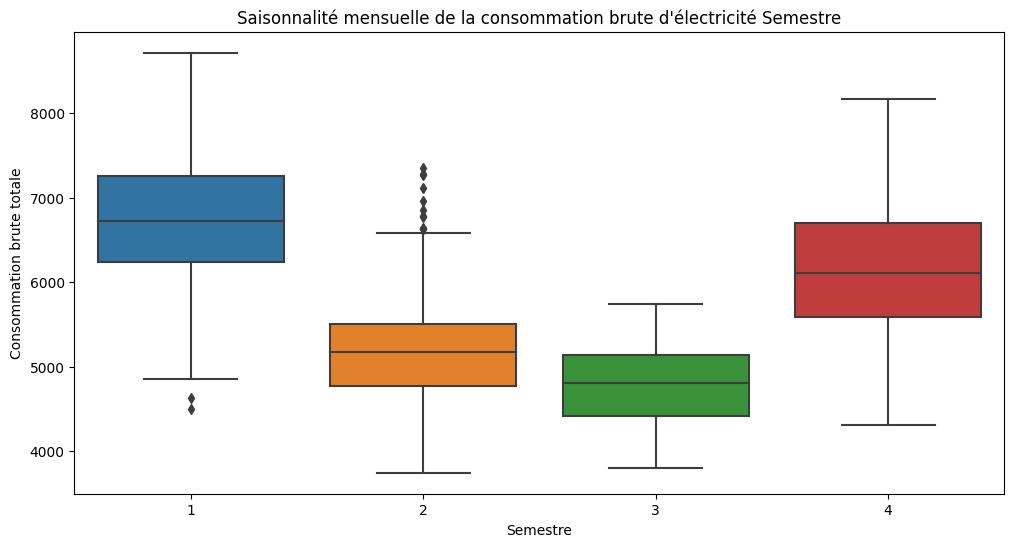

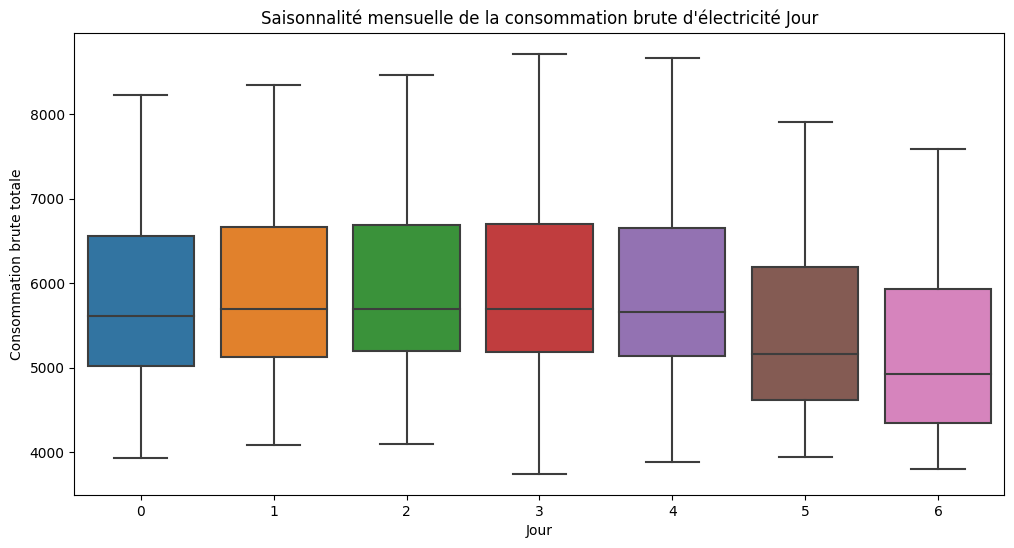

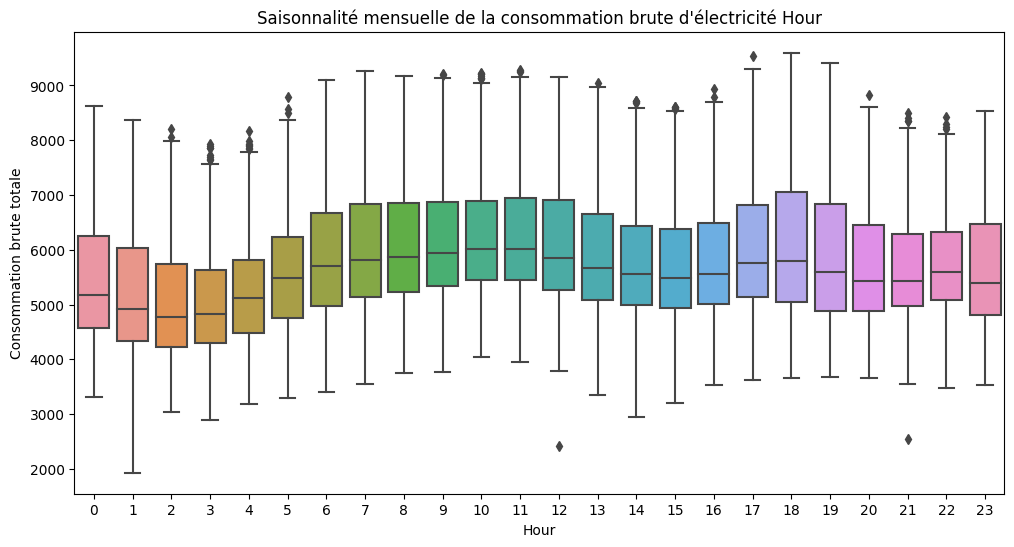

In [37]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()

# Extraire le mois de la colonne d'index
df_hauts_de_france_daily['month'] = df_hauts_de_france_daily.index.month

# Créer un boxplot pour la saisonnalité mensuelle
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hauts_de_france_daily, x='month', y='consommation_brute_electricite_rte')
plt.title('Saisonnalité mensuelle de la consommation brute d\'électricité MOIS')
plt.xlabel('Mois')
plt.ylabel('Consommation brute totale')
plt.show()

df_hauts_de_france_daily['quarter'] = df_hauts_de_france_daily.index.quarter

# Créer un boxplot pour la saisonnalité mensuelle
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hauts_de_france_daily, x='quarter', y='consommation_brute_electricite_rte')
plt.title('Saisonnalité mensuelle de la consommation brute d\'électricité Semestre')
plt.xlabel('Semestre')
plt.ylabel('Consommation brute totale')
plt.show()

df_hauts_de_france_daily['day'] = df_hauts_de_france_daily.index.dayofweek

# Créer un boxplot pour la saisonnalité mensuelle
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hauts_de_france_daily, x='day', y='consommation_brute_electricite_rte')
plt.title('Saisonnalité mensuelle de la consommation brute d\'électricité Jour')
plt.xlabel('Jour')
plt.ylabel('Consommation brute totale')
plt.show()


df_hauts_de_france['hour'] = df_hauts_de_france.index.hour

# Créer un boxplot pour la saisonnalité mensuelle
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hauts_de_france, x='hour', y='consommation_brute_electricite_rte')
plt.title('Saisonnalité mensuelle de la consommation brute d\'électricité Hour')
plt.xlabel('Hour')
plt.ylabel('Consommation brute totale')
plt.show()

### Q6

Qu’est ce que la stationnarité? 

La stationnarité est un concept fondamental en analyse des séries temporelles. Une série temporelle est dite stationnaire si ses propriétés statistiques ne changent pas avec le temps. Plus précisément, cela signifie que la moyenne, la variance, et la structure d'autocorrélation de la série restent constantes au fil du temps.

Il existe plusieurs raisons pour lesquelles la stationnarité est importante :

    Prévisibilité : De nombreux modèles de séries temporelles, comme le modèle ARIMA, supposent que la série est stationnaire. Ces modèles sont plus fiables et prévisibles lorsque cette hypothèse est respectée.

    Interprétabilité : Il est plus facile d'interpréter les relations et la dynamique dans les données lorsque la série est stationnaire.

    Réduction du bruit : Transformer une série pour la rendre stationnaire peut aider à réduire le bruit et à mettre en évidence les composantes sous-jacentes de la série, comme la tendance ou la saisonnalité.

Il existe différents types de stationnarité :

    Stationnarité stricte : La distribution conjointe des observations reste la même lorsque décalée dans le temps. Cela implique que la moyenne, la variance, et la covariance entre deux périodes (l'autocorrélation) restent constantes au fil du temps.

    Stationnarité faible : Seule la moyenne et la variance restent constantes. C'est le type de stationnarité le plus couramment utilisé en analyse de séries temporelles.

Pour déterminer si une série temporelle est stationnaire, on peut utiliser des tests statistiques comme le test de Dickey-Fuller augmenté. Si une série n'est pas stationnaire, des transformations comme la différenciation ou la transformation logarithmique peuvent être utilisées pour la rendre stationnaire.

### Q7


Notre TS visuelement est non-stationnaire.

### Q8

Réalisez un test de Dickey Fuller, 
- quelle est l’hypothèse nulle et l’hypothèse alternative, 
- quelle est la statistique calculée et quelle distribution théorique suit elle d’après l’hypothèse nulle. 
- Quelle est la probabilité que la statistique sous l’hypothèse H0 prenne un valeur aussi extrême voir plus extrême? 


Pour réaliser un test de Dickey-Fuller augmenté (ADF) sur une série temporelle, nous utilisons la fonction adfuller du module statsmodels.tsa.stattools.

Le test de Dickey-Fuller est utilisé pour déterminer la présence d'une unité racine dans une série temporelle, ce qui est un indicateur de non-stationnarité. Les hypothèses du test sont les suivantes :

    Hypothèse nulle (H0H0​) : La série temporelle a une unité racine (c'est-à-dire qu'elle n'est pas stationnaire).
    Hypothèse alternative (H1H1​) : La série temporelle n'a pas d'unité racine (c'est-à-dire qu'elle est stationnaire).

Si la valeur pp du test est faible (typiquement <0,05<0,05), nous rejetons l'hypothèse nulle en faveur de l'hypothèse alternative et concluons que la série est stationnaire.

In [48]:
from statsmodels.tsa.stattools import adfuller

# Réaliser le test de Dickey-Fuller sur la série temporelle
result = adfuller(df_hauts_de_france_monthly['consommation_brute_electricite_rte'].dropna(),autolag='AIC')

# Extraire les résultats
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

adf_statistic, p_value, critical_values

(-0.801467923064124,
 0.8186904960004292,
 {'1%': -3.489057523907491,
  '5%': -2.887246327182993,
  '10%': -2.5804808802708528})

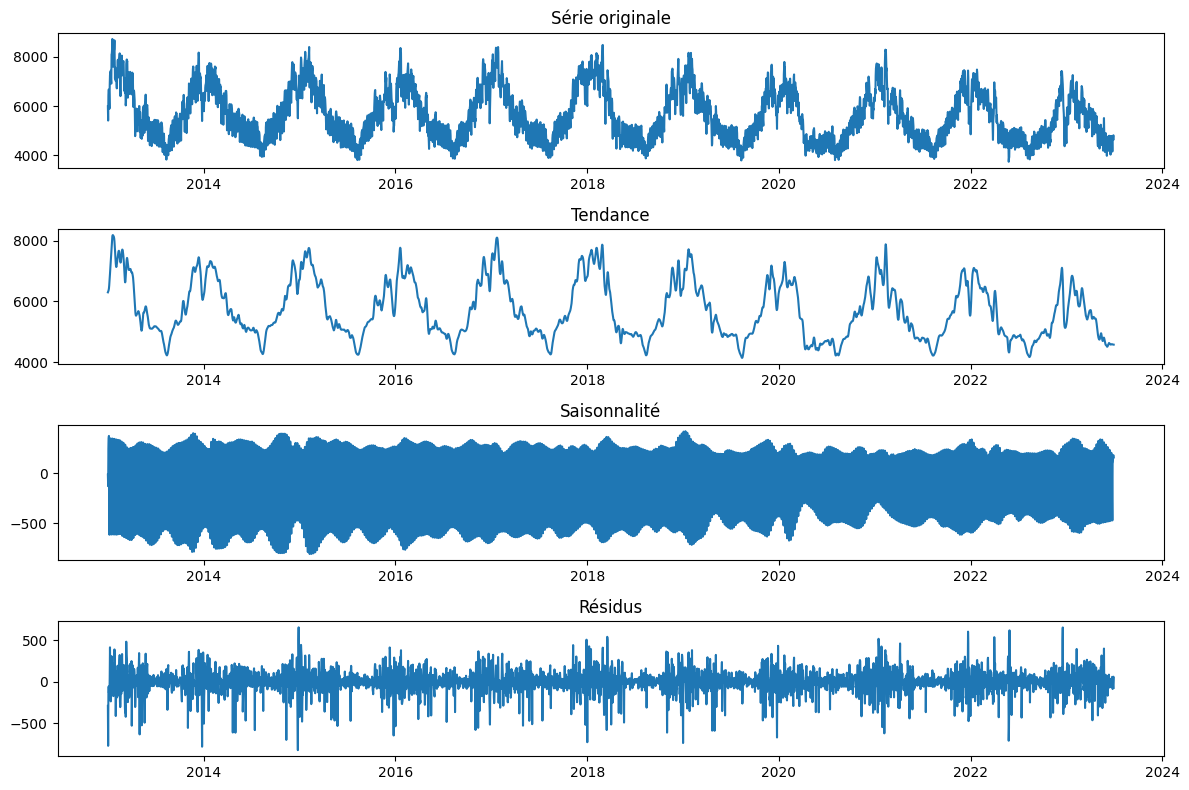

Statistique de test ADF: -3.975952659113788
Valeur p: 0.0015417990167558918
Valeurs critiques: {'1%': -3.432070672988693, '5%': -2.8623002987378547, '10%': -2.567174716967499}


In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Chargez votre dataframe et préparez-le comme vous l'avez fait précédemment
# df_hauts_de_france = ...

# Utilisez la décomposition STL
stl = STL(df_hauts_de_france_daily['consommation_brute_electricite_rte'], seasonal=13)
result = stl.fit()
detrended = result.trend + result.resid

# Affichez les composantes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 8))
ax1.plot(result.observed)
ax1.set_title('Série originale')
ax2.plot(result.trend)
ax2.set_title('Tendance')
ax3.plot(result.seasonal)
ax3.set_title('Saisonnalité')
ax4.plot(result.resid)
ax4.set_title('Résidus')
plt.tight_layout()
plt.show()

# Appliquez le test de Dickey-Fuller à la composante résiduelle
adf_result = adfuller(detrended.dropna())
print(f"Statistique de test ADF: {adf_result[0]}")
print(f"Valeur p: {adf_result[1]}")
print(f"Valeurs critiques: {adf_result[4]}")


### Q9

In [46]:
from statsmodels.tsa.stattools import kpss

# Appliquer le test KPSS à la série sans tendance et saisonnalité
kpss_result = kpss(df_hauts_de_france_daily['consommation_brute_electricite_rte'].dropna(), regression='c')  # 'c' pour une stationnarité autour d'une constante

print(f"Statistique de test KPSS: {kpss_result[0]}")
print(f"Valeur p: {kpss_result[1]}")
print(f"Valeurs critiques: {kpss_result[3]}")


Statistique de test KPSS: 0.49341650122711717
Valeur p: 0.043149436660559204
Valeurs critiques: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


### Q10
